In [1]:
# Import dependencies
from scipy.io import wavfile
from sklearn.svm import SVC
from scipy.signal import spectrogram
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from pathlib import Path

import glob
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import random
#assert tf.__version__ == "1.7.0"
#tf.logging.set_verbosity(tf.logging.INFO)


In [2]:
dataset = [{'path': path, 'label': path.split('/' )[6] } for path in glob.glob("/workspaces/python_env1/Creative_factory/the-circor-digiscope-phonocardiogram-dataset-1.0.3/PV/**/*.wav")]
df = pd.DataFrame.from_dict(dataset)
print(dataset[0])

# Add a column to store the data read from each wavfile...   
df['x'] = df['path'].apply(lambda x: wavfile.read(x)[1])
df.head()

{'path': '/workspaces/python_env1/Creative_factory/the-circor-digiscope-phonocardiogram-dataset-1.0.3/abnormal/50066_AV.wav', 'label': 'abnormal'}


,path,label,x
0,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[513, 349, 64, -77, 140, 211, -57, -206, -177,..."
1,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[-425, 1045, 518, -674, -690, -588, -237, -276..."
2,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[63, 464, 1166, 1616, 1765, 1630, 1214, 708, 4..."
3,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[0, -174, -735, -850, -324, -132, -105, -86, -..."
4,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[11237, 2592, 12670, 3008, 7996, 9790, 5901, 6..."


# Sample class audio plot 

Displaying all three kinds of audio classes normal, abnormal and extrasystole. We can see different patters in various classes.


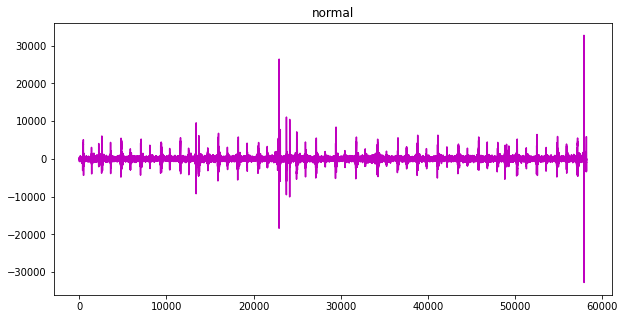

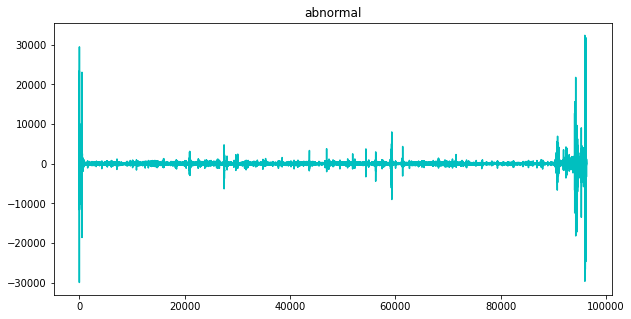

In [3]:
#Choosing one of the each samples form each catogery 
normal = df[df['label'] == 'normal' ].sample(1)
abnormal = df[df['label'] == 'abnormal' ].sample(1)
#extrasystole = df[df['label'] == 'extsys' ].sample(1)

# Plot the three samples onto three different figures
plt.figure(1, figsize=(10,5))
plt.title('normal')
plt.plot(normal['x'].values[0], c='m')

plt.figure(2, figsize=(10, 5))
plt.title('abnormal')
plt.plot(abnormal['x'].values[0], c='c')

#plt.figure(3, figsize=(10, 5))
#plt.title('extrasystole')
#plt.plot(extrasystole['x'].values[0], c='b')

In [4]:
#make the lenght of all audio files same by repeating audio file contents till its length is equal to max length audio file
max_length = max(df['x'].apply(len))

# Kaggle: What's in a heartbeat? - Peter Grenholm
def repeat_to_length(arr, length):
    """Repeats the numpy 1D array to given length, and makes datatype float"""
    result = np.empty((length, ), dtype = np.float32)
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

df['x'] = df['x'].apply(repeat_to_length, length=max_length)
df.head()

,path,label,x
0,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[513.0, 349.0, 64.0, -77.0, 140.0, 211.0, -57...."
1,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[-425.0, 1045.0, 518.0, -674.0, -690.0, -588.0..."
2,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[63.0, 464.0, 1166.0, 1616.0, 1765.0, 1630.0, ..."
3,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[0.0, -174.0, -735.0, -850.0, -324.0, -132.0, ..."
4,/workspaces/python_env1/Creative_factory/the-c...,abnormal,"[11237.0, 2592.0, 12670.0, 3008.0, 7996.0, 979..."


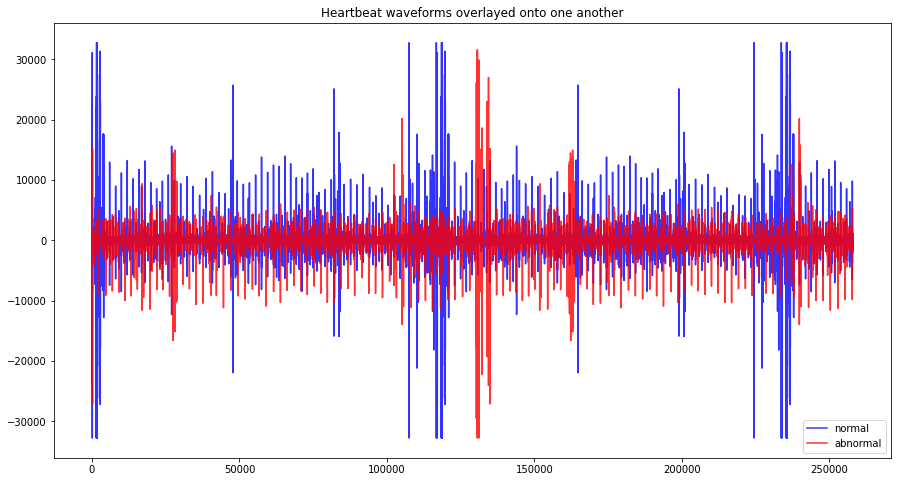

In [5]:
# Collect one sample from each of the three classes and plot their waveforms
normal = df[df['label'] == 'normal' ].sample(1)
abnormal = df[df['label'] == 'abnormal' ].sample(1)
#extrasystole = df[df['label'] == 'extsys' ].sample(1)

plt.figure(1, figsize=(15,8))
plt.plot(normal['x'].values[0], c='b', label='normal', alpha=0.8)
plt.plot(abnormal['x'].values[0], c='r', label='abnormal', alpha=0.8)
#plt.plot(extrasystole['x'].values[0], c='g', label='extrasystole', alpha=0.8)

plt.title('Heartbeat waveforms overlayed onto one another')
plt.legend(loc='lower right')
# plt.savefig('temp.png')

"\nf_extra, t_extra, Sxx_extra = spectrogram(extrasystole['x'].values[0], 4000)\nplt.figure(3, figsize=(20, 5))\nplt.title('Extrasystole')\nplt.pcolormesh(t_extra, f_extra, Sxx_extra, cmap='Spectral')\nplt.ylabel('Frequency [Hz]')\nplt.xlabel('Time [sec]')\n"

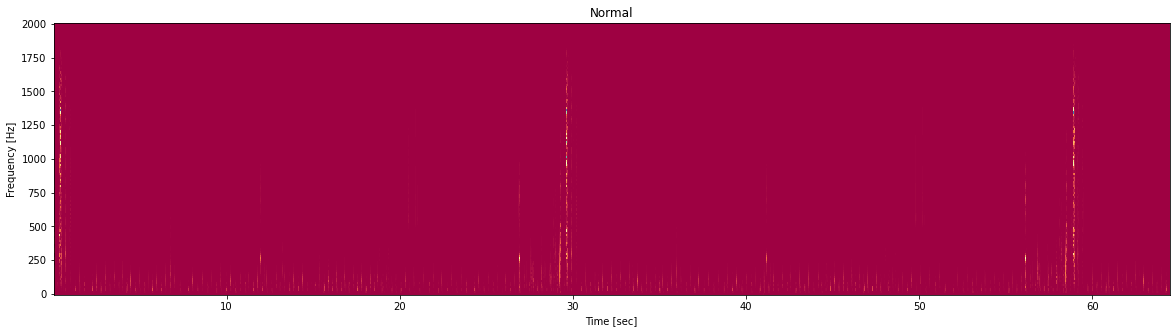

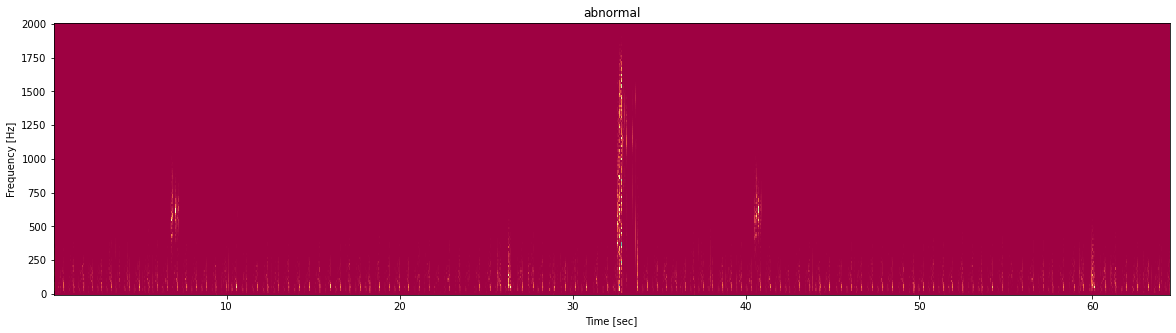

In [6]:
fs = 4000
f_normal, t_normal, Sxx_normal = spectrogram(normal['x'].values[0], 4000)
plt.figure(1, figsize=(20,5))
plt.title('Normal')
plt.pcolormesh(t_normal, f_normal, Sxx_normal, cmap='Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

f_abnormal, t_abnormal, Sxx_abnormal = spectrogram(abnormal['x'].values[0], 4000)
plt.figure(2, figsize=(20, 5))
plt.title('abnormal')
plt.pcolormesh(t_abnormal, f_abnormal, Sxx_abnormal, cmap='Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

"""
f_extra, t_extra, Sxx_extra = spectrogram(extrasystole['x'].values[0], 4000)
plt.figure(3, figsize=(20, 5))
plt.title('Extrasystole')
plt.pcolormesh(t_extra, f_extra, Sxx_extra, cmap='Spectral')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
"""

In [7]:
# Put the data into numpy arrays. Most machine learning libraries use numpy arrays.
x = np.stack(df['x'].values, axis=0)
y = np.stack(df['label'].values, axis=0)

In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test, train_filenames, test_filenames = train_test_split(x, df['label'].values, df['path'].values, train_size = 0.4, test_size=0.2)
print("x_train: {0}, x_test: {1}".format(x_train.shape, x_test.shape))

x_train = x_train[:, 30000:100000]

x_test = x_test[:, 30000:100000]

print("x_train: {0}, x_test: {1}".format(x_train.shape, x_test.shape))

x_train: (1265, 258048), x_test: (633, 258048)
x_train: (1265, 70000), x_test: (633, 70000)


In [9]:
clf = SVC()


In [10]:
clf.fit(x_train, y_train)


SVC()

In [11]:
predictions = clf.predict(x_test)
print("Accuracy %.3f" % accuracy_score(y_test, predictions))

Accuracy 0.529


In [12]:
clf = MLPClassifier(hidden_layer_sizes=(1024,512,256,128,), 
                    max_iter=5000, verbose=True)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print("Accuracy %.3f" % accuracy_score(y_test, predictions))

Iteration 1, loss = 8.10900912
Iteration 2, loss = 4.91819889
Iteration 3, loss = 2.16413588
Iteration 4, loss = 0.90742463
Iteration 5, loss = 0.39360749
Iteration 6, loss = 0.78579908
Iteration 7, loss = 1.01951692
Iteration 8, loss = 0.26631733
Iteration 9, loss = 0.06469184
Iteration 10, loss = 0.07730619
Iteration 11, loss = 0.01626267
Iteration 12, loss = 0.00175297
Iteration 13, loss = 0.00170489
Iteration 14, loss = 0.00170619
Iteration 15, loss = 0.00170682
Iteration 16, loss = 0.00170710
Iteration 17, loss = 0.00170722
Iteration 18, loss = 0.00170725
Iteration 19, loss = 0.00170725
Iteration 20, loss = 0.00170723
Iteration 21, loss = 0.00170720
Iteration 22, loss = 0.00170718
Iteration 23, loss = 0.00170715
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy 0.496


In [13]:
# Convert data to the format tf.keras expects
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(1265, 70000, 1)

# CNN Model

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=9, activation='relu',
                input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=9, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(strides=4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.GlobalAvgPool1D())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

2022-08-11 15:27:40.310374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 15:27:40.358171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 15:27:40.359528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 15:27:40.362923: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
# Need to convert y labels into one-hot encoded vectors
y_train_int_categories, y_train_class_names = pd.factorize(y_train)
print("y_train_class_names: {0}".format(y_train_class_names))

y_test_int_categories, y_test_class_names = pd.factorize(y_test)
print("y_test_class_names: {0}".format(y_test_class_names))
y_train_hot = tf.keras.utils.to_categorical(y_train_int_categories)
y_test_hot = tf.keras.utils.to_categorical(y_test_int_categories)

hist = model.fit(x_train, y_train_hot, 
                 epochs=20,
                 validation_data=(x_test, y_test_hot), verbose=1)

y_train_class_names: ['abnormal' 'normal']
y_test_class_names: ['abnormal' 'normal']


2022-08-11 15:27:41.520523: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 354200000 exceeds 10% of free system memory.
2022-08-11 15:27:41.782674: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 354200000 exceeds 10% of free system memory.


Epoch 1/20


2022-08-11 15:27:44.432517: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


# Plot of accuracy and loss

In [ ]:
print(hist.history)
accuracy = hist.history['val_accuracy']
loss = hist.history['val_loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()


In [ ]:
import time
start = time.time()*1000
model.predict(x_test)
end = time.time()*1000
total = end - start
print("Total prediction time (milliseconds) for %d samples: %f" % (len(x_test), total))
print("Average prediction time for one example: %f" % (total/len(x_test)))

In [ ]:
# Save the train model
tf.keras.models.save_model(
    model,
    filepath='C:/Users/apt/Desktop/save_model',
    overwrite=True,
    include_optimizer=True
)